In [1219]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1220]:
#import the numpy for scientific computing
import numpy as np

#import the pandas for the for manipulating all sort of data sets
import pandas as pd

In [1221]:
#reading the data set into the data frame of pandas
cars = pd.read_csv('C:\\Linerar_regression_model\\Data_set\\CarPrice_Assignment.csv')

# Check the head of the data frame cars
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [1222]:
#observations at the data frame
cars.shape

(205, 26)

In [1223]:
#checking the information about the data frame 
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [1224]:
#describe the data frame to check for the its distrubution
cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [1225]:
#data preparation we should be only consider company of the car not the name 
cars['CarCompanyNameOnly'] = cars['CarName'].str.split(' ').str[0]

In [1226]:
#convert all the value of CarCompanyNameOnly to lower case 
cars['CarCompanyNameOnly'] = cars['CarCompanyNameOnly'].str.lower()

cars.groupby('CarCompanyNameOnly').size()

CarCompanyNameOnly
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
dtype: int64

In [1227]:
#from the above observation we can see that 
#"mazda" is mis spelt as "maxda"
#"porsche" is mis spelt as "porcshce"
#"toyota" is mis spelt as "toyouta"
#"volkswagen" is mis spelt as "vokswagen and vw"
#hence we should correct the spellings of these car company names 

cars['CarCompanyNameOnly'] = cars['CarCompanyNameOnly'].replace(['maxda'],'mazda')
cars['CarCompanyNameOnly'] = cars['CarCompanyNameOnly'].replace(['porcshce'],'porsche')
cars['CarCompanyNameOnly'] = cars['CarCompanyNameOnly'].replace(['toyouta'],'toyota')
cars['CarCompanyNameOnly'] = cars['CarCompanyNameOnly'].replace(['vokswagen','vw'],'volkswagen')

#confirm all the mis spelt words are replaced with correct spelling
cars.groupby('CarCompanyNameOnly').size()

CarCompanyNameOnly
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
dtype: int64

In [1228]:
#import the matplotlib for the visualizations 
import matplotlib.pyplot as plt

#import the seaborn for the visualizations
import seaborn as sns

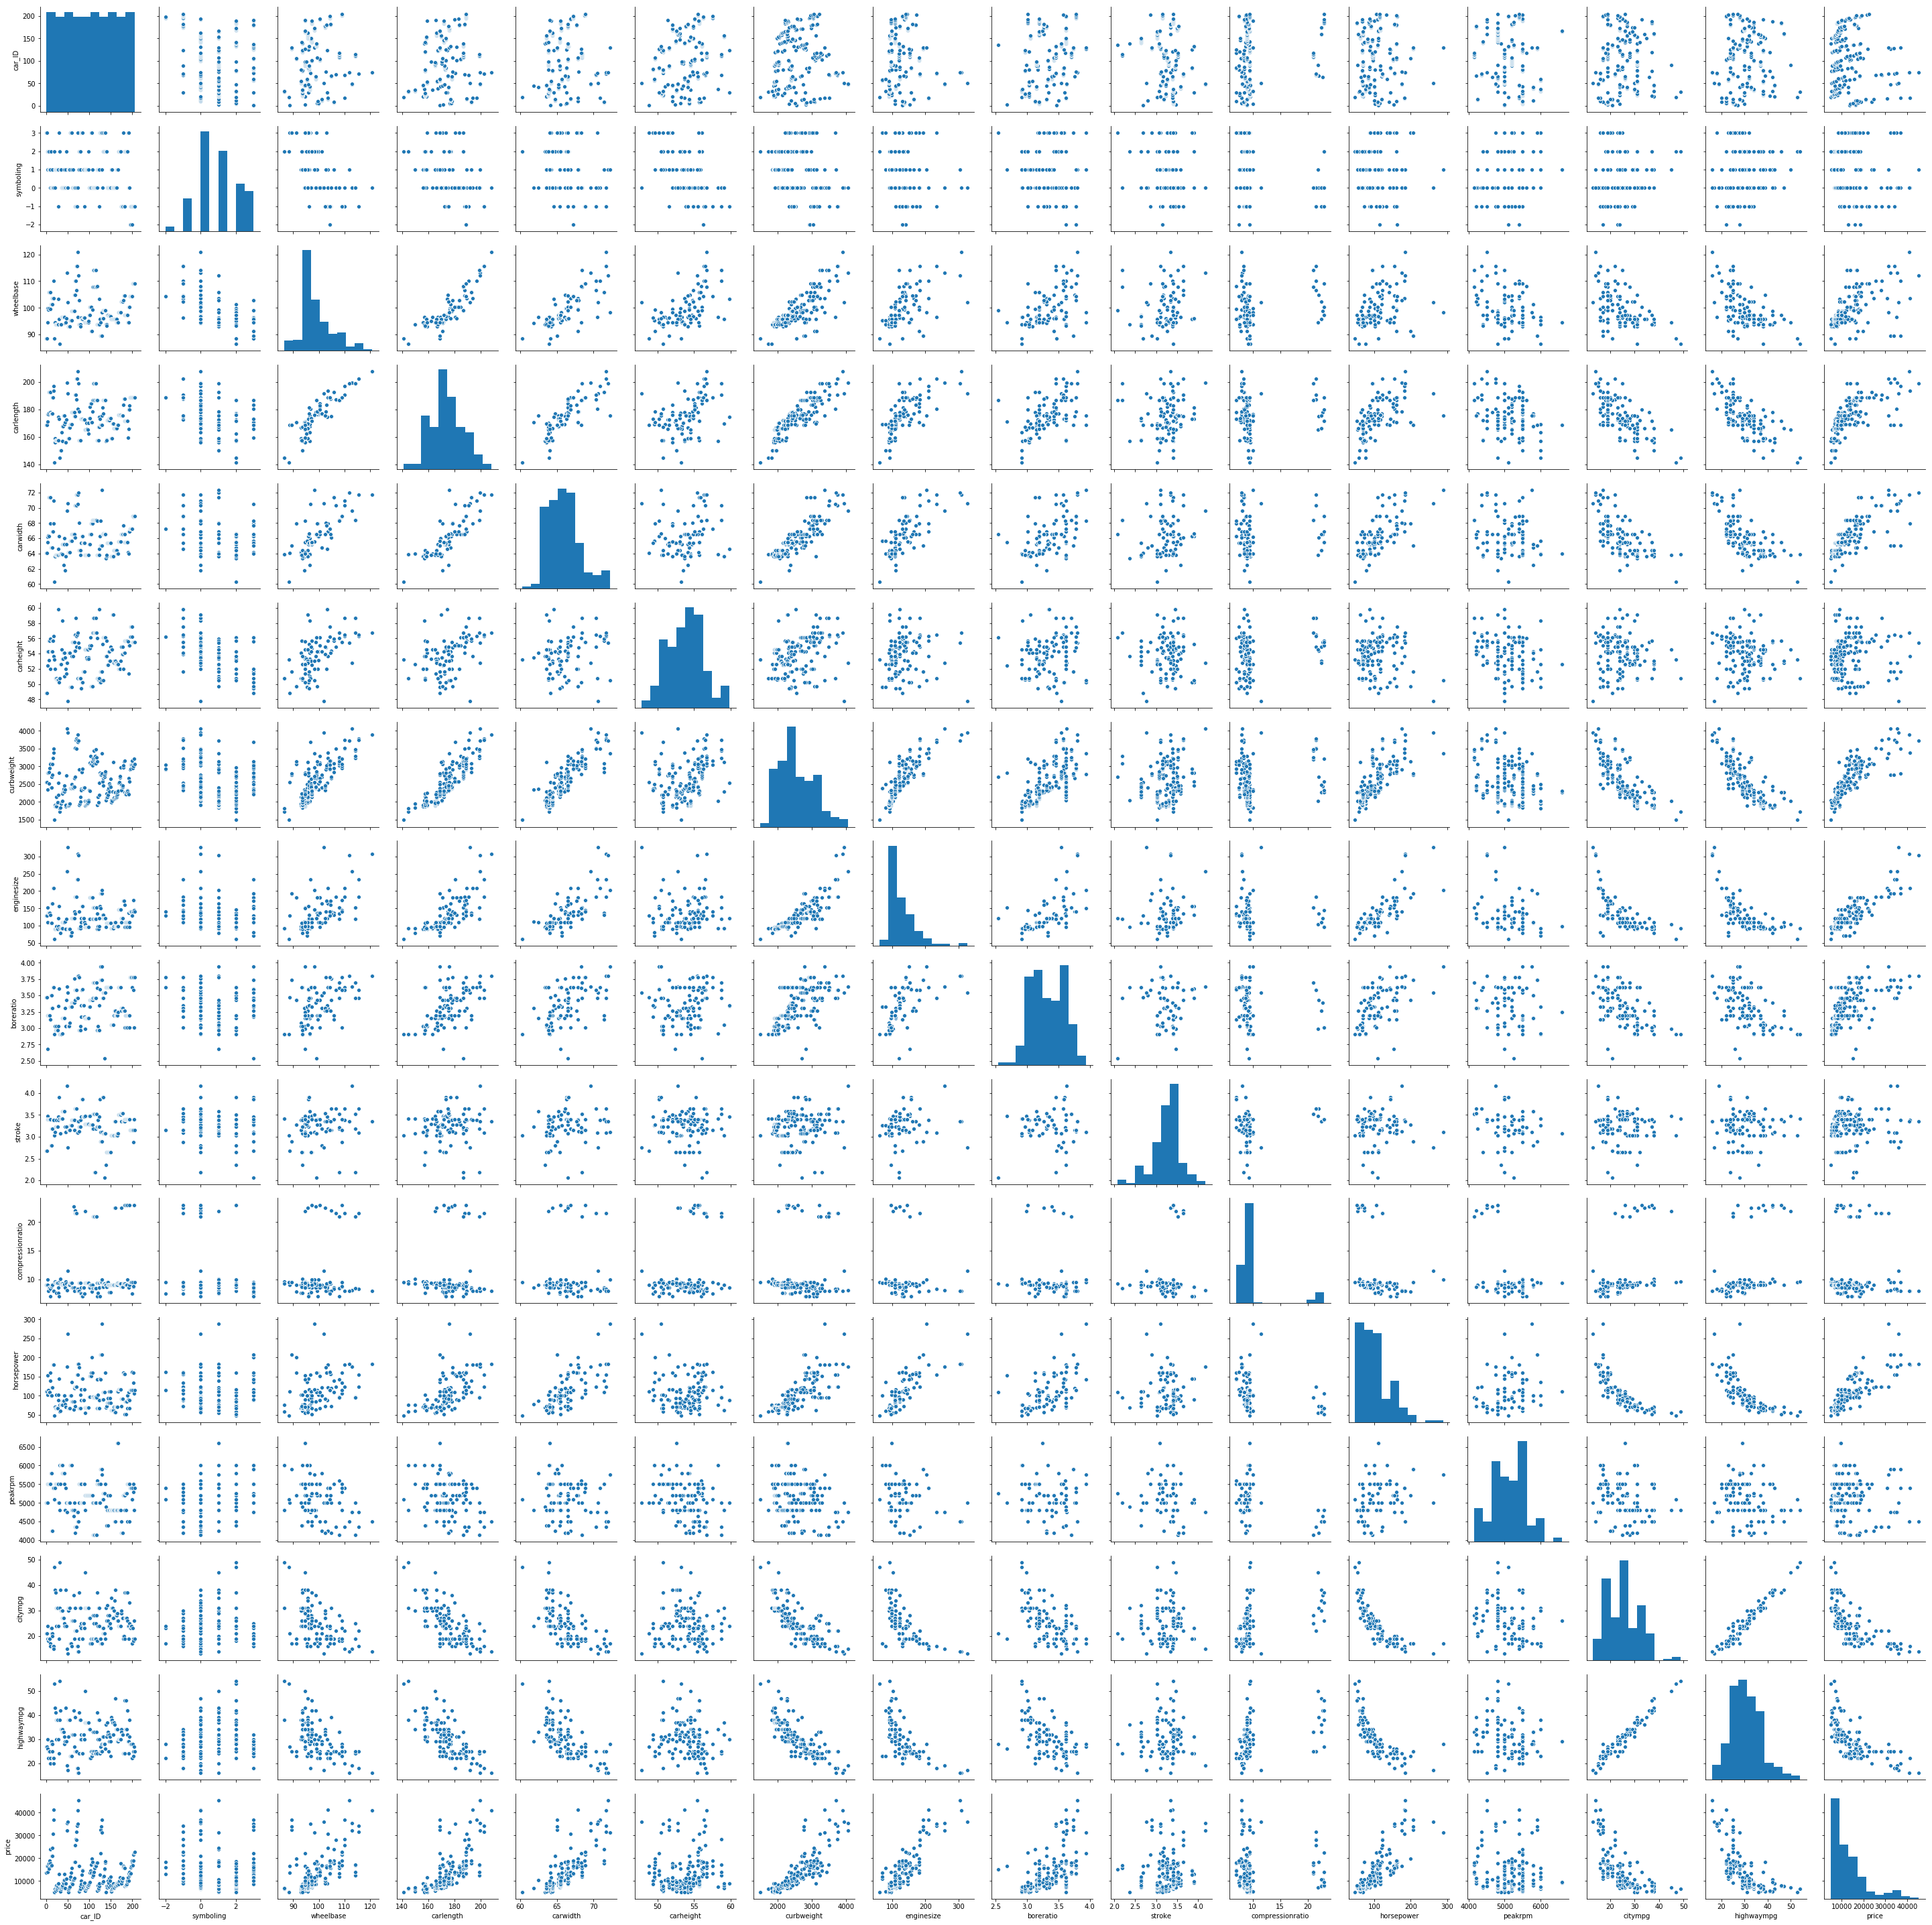

In [1229]:
#Visualising Numeric Variables
sns.pairplot(cars)
plt.show()

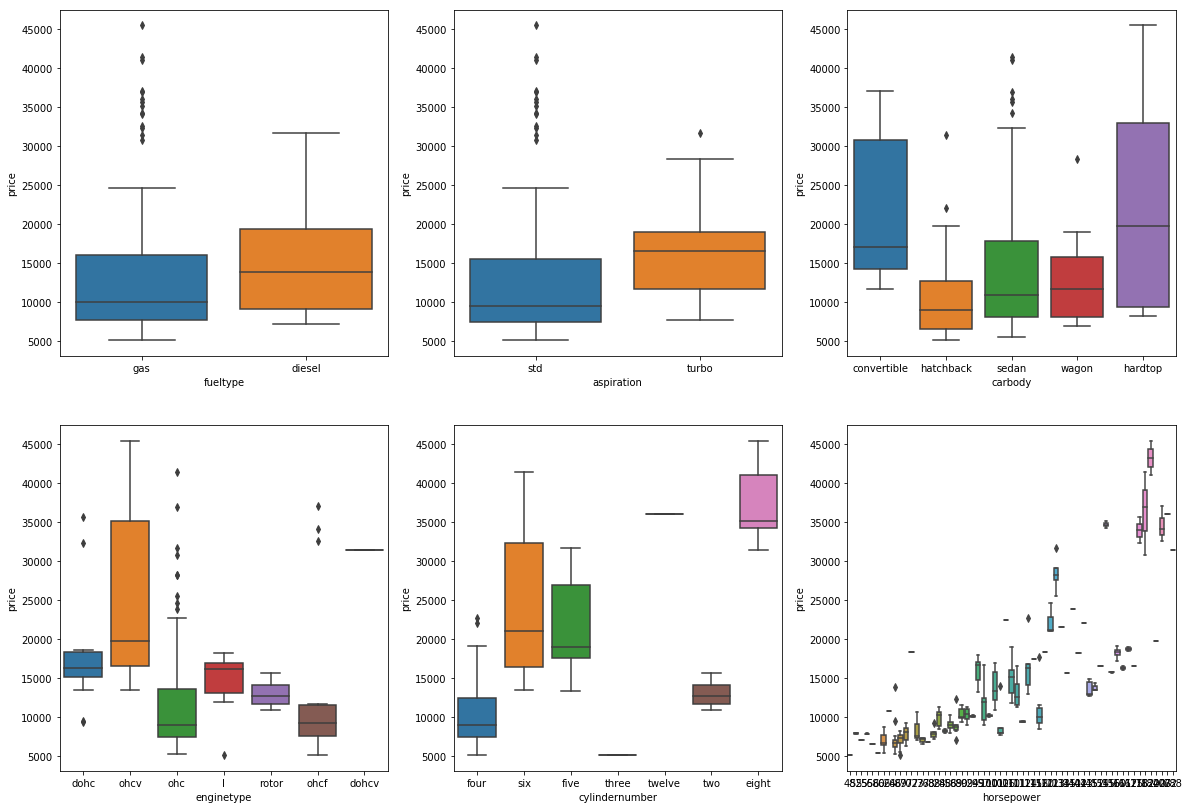

In [1232]:
#Visualising Categorical Variables
plt.figure(figsize=(20, 14))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(2,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(2,3,4)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)
plt.subplot(2,3,5)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars)
plt.subplot(2,3,6)
sns.boxplot(x = 'horsepower', y = 'price', data = cars)
plt.show()

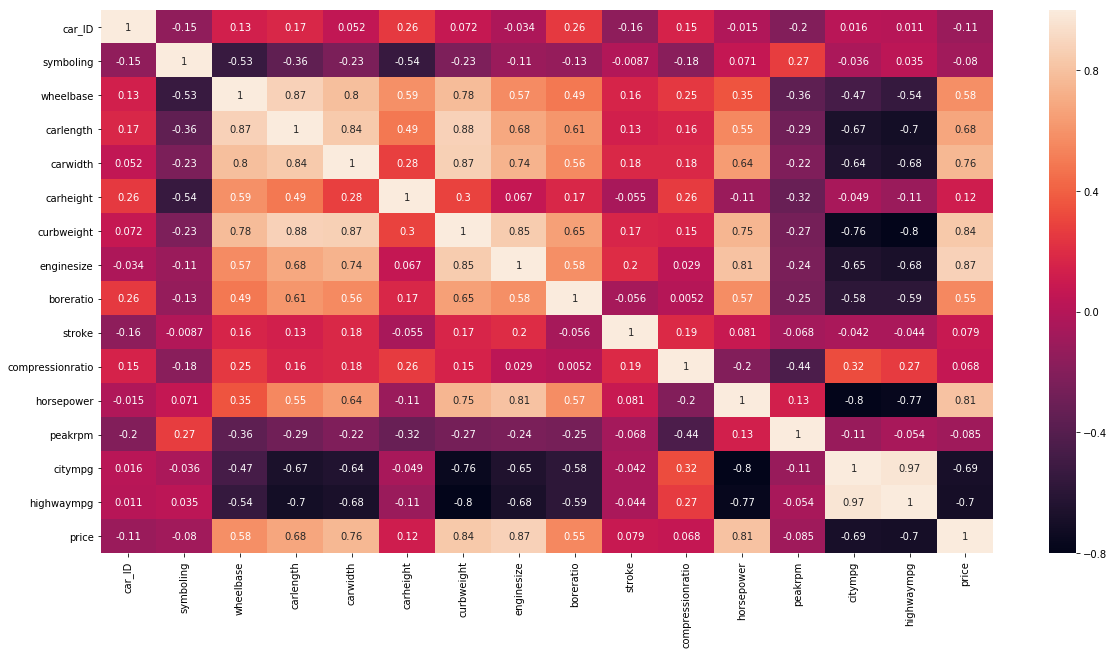

In [1233]:
plt.figure(figsize = (20,10))  
sns.heatmap(cars.corr(),annot = True)

In [1234]:
#highly coorelated data 
#from the above heat map we found that carlength, curbweight, wheelbase and carwidth. hence dropping carwidth,curbweight wheelbase 
#we can see the high co relation between highwaympg and citympg. hence dropping citympg
#dropping car_id just an id 
cars.drop(['carwidth','curbweight','wheelbase','highwaympg','car_ID'], axis =1, inplace = True)

In [1235]:
# Defining the map function for fuel type 
def binary_map_fuel_type(x):
    return x.map({"diesel": 1, "gas": 0})

# Defining the map function for aspiration
def binary_map_aspiration(x):
    return x.map({'std': 1, 'turbo': 0})

# Defining the map function for door number
def binary_map_door_number(x):
    return x.map({'two': 1, 'four': 0})

# Defining the map function for engine location
def binary_map_engine_location(x):
    return x.map({'front': 1, 'rear': 0})

#change the fuel type(diesel = 1,gas = 0) type categorical value into numerical value 
cars['fueltype'] = cars[['fueltype']].apply(binary_map_fuel_type)

#change the aspiration (std = 1,turbo = 0) type categorical value into numerical value 
cars['aspiration'] = cars[['aspiration']].apply(binary_map_aspiration)

#change the doornumber (two = 1,four = 0) type categorical value into numerical value 
cars['doornumber'] = cars[['doornumber']].apply(binary_map_door_number)

#change the enginelocation (front = 1,rear = 0) type categorical value into numerical value 
cars['enginelocation'] = cars[['enginelocation']].apply(binary_map_engine_location)

In [1236]:
# Get the dummy variables for the feature 'enginetype' and store in a dataframe - 'engine_type_df'
engine_type_df = pd.get_dummies(cars['enginetype'])

In [1237]:
#renaming the column names accordingly 
engine_type_df.rename(columns={'dohcv': 'engine_type_dohcv','dohc': 'engine_type_dohc', 'l': 'engine_type_l','ohc': 'engine_type_ohc', 'ohcf': 'engine_type_ohcf','ohcv': 'engine_type_ohcv', 'rotor': 'engine_type_rotor'}, inplace=True)

In [1238]:
engine_type_df.head()

engine_type_dohc  engine_type_dohcv  engine_type_l  engine_type_ohc  \
0                 1                  0              0                0   
1                 1                  0              0                0   
2                 0                  0              0                0   
3                 0                  0              0                1   
4                 0                  0              0                1   

   engine_type_ohcf  engine_type_ohcv  engine_type_rotor  
0                 0                 0                  0  
1                 0                 0                  0  
2                 0                 1                  0  
3                 0                 0                  0  
4                 0                 0                  0

In [1239]:
# Add the results to the original cars dataframe
cars = pd.concat([cars, engine_type_df], axis = 1)

In [1240]:
cars.head()

symboling                   CarName  fueltype  aspiration  doornumber  \
0          3        alfa-romero giulia         0           1           1   
1          3       alfa-romero stelvio         0           1           1   
2          1  alfa-romero Quadrifoglio         0           1           1   
3          2               audi 100 ls         0           1           0   
4          2                audi 100ls         0           1           0   

       carbody drivewheel  enginelocation  carlength  carheight  \
0  convertible        rwd               1      168.8       48.8   
1  convertible        rwd               1      168.8       48.8   
2    hatchback        rwd               1      171.2       52.4   
3        sedan        fwd               1      176.6       54.3   
4        sedan        4wd               1      176.6       54.3   

         ...         citympg    price  CarCompanyNameOnly engine_type_dohc  \
0        ...              21  13495.0         alfa-romero                1   
1        ...              21  16500.0         alfa-romero                1   
2        ...              19  16500.0         alfa-romero                0   
3        ...              24  13950.0                audi                0   
4        ...              18  17450.0                audi                0   

   engine_type_dohcv  engine_type_l  engine_type_ohc  engine_type_ohcf  \
0                  0              0                0                 0   
1                  0              0                0                 0   
2                  0              0                0                 0   
3                  0              0                1                 0   
4                  0              0                1                 0   

   engine_type_ohcv  engine_type_rotor  
0                 0                  0  
1                 0                  0  
2                 1                  0  
3                 0                  0  
4                 0                  0  

[5 rows x 29 columns]

In [1241]:
# enginetype is not required since categorical data is converted into numeric data
cars.drop(['enginetype'], axis =1, inplace = True)

In [1242]:
# Get the dummy variables for the feature 'carbody' and store it in a dataframe - 'car_body_df'
car_body_df = pd.get_dummies(cars['carbody'])

In [1243]:
#renaming the column names accordingly 
car_body_df.rename(columns={'convertible': 'car_body_convertible','hardtop': 'car_body_hardtop', 'hatchback': 'car_body_hatchback','sedan': 'car_body_sedan', 'wagon': 'car_body_wagon'}, inplace=True)

In [1244]:
car_body_df.head()

car_body_convertible  car_body_hardtop  car_body_hatchback  car_body_sedan  \
0                     1                 0                   0               0   
1                     1                 0                   0               0   
2                     0                 0                   1               0   
3                     0                 0                   0               1   
4                     0                 0                   0               1   

   car_body_wagon  
0               0  
1               0  
2               0  
3               0  
4               0

In [1245]:
# Add the results to the original cars dataframe
cars = pd.concat([cars, car_body_df], axis = 1)

In [1246]:
# carbody is not required since categorical data is converted into numeric data
cars.drop(['carbody'], axis =1, inplace = True)

In [1247]:
cars.head()

symboling                   CarName  fueltype  aspiration  doornumber  \
0          3        alfa-romero giulia         0           1           1   
1          3       alfa-romero stelvio         0           1           1   
2          1  alfa-romero Quadrifoglio         0           1           1   
3          2               audi 100 ls         0           1           0   
4          2                audi 100ls         0           1           0   

  drivewheel  enginelocation  carlength  carheight cylindernumber  \
0        rwd               1      168.8       48.8           four   
1        rwd               1      168.8       48.8           four   
2        rwd               1      171.2       52.4            six   
3        fwd               1      176.6       54.3           four   
4        4wd               1      176.6       54.3           five   

       ...        engine_type_l engine_type_ohc  engine_type_ohcf  \
0      ...                    0               0                 0   
1      ...                    0               0                 0   
2      ...                    0               0                 0   
3      ...                    0               1                 0   
4      ...                    0               1                 0   

   engine_type_ohcv  engine_type_rotor  car_body_convertible  \
0                 0                  0                     1   
1                 0                  0                     1   
2                 1                  0                     0   
3                 0                  0                     0   
4                 0                  0                     0   

   car_body_hardtop  car_body_hatchback  car_body_sedan car_body_wagon  
0                 0                   0               0              0  
1                 0                   0               0              0  
2                 0                   1               0              0  
3                 0                   0               1              0  
4                 0                   0               1              0  

[5 rows x 32 columns]

In [1248]:
# Get the dummy variables for the feature 'drivewheel' and store it in a dataframe - 'drive_wheel_df'
drive_wheel_df = pd.get_dummies(cars['drivewheel'])

In [1249]:
#renaming the column names accordingly 
drive_wheel_df.rename(columns={'4wd': 'drive_wheel_4wd','fwd': 'drive_wheel_fwd', 'rwd': 'drive_wheel_rwd'}, inplace=True)

In [1250]:
drive_wheel_df.head()

drive_wheel_4wd  drive_wheel_fwd  drive_wheel_rwd
0                0                0                1
1                0                0                1
2                0                0                1
3                0                1                0
4                1                0                0

In [1251]:
# Add the results to the original cars dataframe
cars = pd.concat([cars, drive_wheel_df], axis = 1)

In [1252]:
# drivewheel is not required since categorical data is converted into numeric data
cars.drop(['drivewheel'], axis =1, inplace = True)

In [1253]:
cars.head()

symboling                   CarName  fueltype  aspiration  doornumber  \
0          3        alfa-romero giulia         0           1           1   
1          3       alfa-romero stelvio         0           1           1   
2          1  alfa-romero Quadrifoglio         0           1           1   
3          2               audi 100 ls         0           1           0   
4          2                audi 100ls         0           1           0   

   enginelocation  carlength  carheight cylindernumber  enginesize  \
0               1      168.8       48.8           four         130   
1               1      168.8       48.8           four         130   
2               1      171.2       52.4            six         152   
3               1      176.6       54.3           four         109   
4               1      176.6       54.3           five         136   

        ...        engine_type_ohcv  engine_type_rotor  car_body_convertible  \
0       ...                       0                  0                     1   
1       ...                       0                  0                     1   
2       ...                       1                  0                     0   
3       ...                       0                  0                     0   
4       ...                       0                  0                     0   

   car_body_hardtop  car_body_hatchback  car_body_sedan  car_body_wagon  \
0                 0                   0               0               0   
1                 0                   0               0               0   
2                 0                   1               0               0   
3                 0                   0               1               0   
4                 0                   0               1               0   

   drive_wheel_4wd drive_wheel_fwd  drive_wheel_rwd  
0                0               0                1  
1                0               0                1  
2                0               0                1  
3                0               1                0  
4                1               0                0  

[5 rows x 34 columns]

In [1254]:
# Get the dummy variables for the feature 'cylindernumber' and store it in a dataframe - 'cylinder_number_df'
cylinder_number_df = pd.get_dummies(cars['cylindernumber'])

In [1255]:
#renaming the column names accordingly 
cylinder_number_df.rename(columns={'two': 'cylinder_number_two','three': 'cylinder_number_three', 'four': 'cylinder_number_four','five ': 'cylinder_number_five','six': 'cylinder_number_six', 'eight': 'cylinder_number_eight','twelve': 'cylinder_number_twelve'}, inplace=True)

In [1256]:
cylinder_number_df.head()

cylinder_number_eight  five  cylinder_number_four  cylinder_number_six  \
0                      0     0                     1                    0   
1                      0     0                     1                    0   
2                      0     0                     0                    1   
3                      0     0                     1                    0   
4                      0     1                     0                    0   

   cylinder_number_three  cylinder_number_twelve  cylinder_number_two  
0                      0                       0                    0  
1                      0                       0                    0  
2                      0                       0                    0  
3                      0                       0                    0  
4                      0                       0                    0

In [1257]:
# Add the results to the original cars dataframe
cars = pd.concat([cars, cylinder_number_df], axis = 1)

In [1258]:
# cylindernumber is not required since categorical data is converted into numeric data
cars.drop(['cylindernumber'], axis =1, inplace = True)

In [1259]:
cars.head()

symboling                   CarName  fueltype  aspiration  doornumber  \
0          3        alfa-romero giulia         0           1           1   
1          3       alfa-romero stelvio         0           1           1   
2          1  alfa-romero Quadrifoglio         0           1           1   
3          2               audi 100 ls         0           1           0   
4          2                audi 100ls         0           1           0   

   enginelocation  carlength  carheight  enginesize fuelsystem  \
0               1      168.8       48.8         130       mpfi   
1               1      168.8       48.8         130       mpfi   
2               1      171.2       52.4         152       mpfi   
3               1      176.6       54.3         109       mpfi   
4               1      176.6       54.3         136       mpfi   

          ...           drive_wheel_4wd  drive_wheel_fwd  drive_wheel_rwd  \
0         ...                         0                0                1   
1         ...                         0                0                1   
2         ...                         0                0                1   
3         ...                         0                1                0   
4         ...                         1                0                0   

   cylinder_number_eight  five  cylinder_number_four  cylinder_number_six  \
0                      0     0                     1                    0   
1                      0     0                     1                    0   
2                      0     0                     0                    1   
3                      0     0                     1                    0   
4                      0     1                     0                    0   

  cylinder_number_three  cylinder_number_twelve  cylinder_number_two  
0                     0                       0                    0  
1                     0                       0                    0  
2                     0                       0                    0  
3                     0                       0                    0  
4                     0                       0                    0  

[5 rows x 40 columns]

In [1260]:
# Get the dummy variables for the feature 'fuelsystem' and store it in a dataframe - 'fuel_system_df'
fuel_system_df = pd.get_dummies(cars['fuelsystem'])

In [1261]:
#renaming the column names accordingly 
fuel_system_df.rename(columns={'1bbl': 'fuel_system_1bbl','2bbl': 'fuel_system_2bbl', '4bbl': 'fuel_system_4bbl','idi': 'fuel_system_idi ','mfi': 'fuel_system_mfi', 'mpfi': 'fuel_system_mpfi','spdi': 'fuel_system_spdi', 'spfi': 'fuel_system_spfi'}, inplace=True)

In [1262]:
fuel_system_df.head()

fuel_system_1bbl  fuel_system_2bbl  fuel_system_4bbl  fuel_system_idi   \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   fuel_system_mfi  fuel_system_mpfi  fuel_system_spdi  fuel_system_spfi  
0                0                 1                 0                 0  
1                0                 1                 0                 0  
2                0                 1                 0                 0  
3                0                 1                 0                 0  
4                0                 1                 0                 0

In [1263]:
# Add the results to the original cars dataframe
cars = pd.concat([cars, fuel_system_df], axis = 1)

In [1264]:
# fuelsystem is not required since categorical data is converted into numeric data
cars.drop(['fuelsystem'], axis =1, inplace = True)

In [1265]:
cars.head()

symboling                   CarName  fueltype  aspiration  doornumber  \
0          3        alfa-romero giulia         0           1           1   
1          3       alfa-romero stelvio         0           1           1   
2          1  alfa-romero Quadrifoglio         0           1           1   
3          2               audi 100 ls         0           1           0   
4          2                audi 100ls         0           1           0   

   enginelocation  carlength  carheight  enginesize  boreratio  \
0               1      168.8       48.8         130       3.47   
1               1      168.8       48.8         130       3.47   
2               1      171.2       52.4         152       2.68   
3               1      176.6       54.3         109       3.19   
4               1      176.6       54.3         136       3.19   

         ...         cylinder_number_twelve  cylinder_number_two  \
0        ...                              0                    0   
1        ...                              0                    0   
2        ...                              0                    0   
3        ...                              0                    0   
4        ...                              0                    0   

   fuel_system_1bbl  fuel_system_2bbl  fuel_system_4bbl  fuel_system_idi   \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

  fuel_system_mfi  fuel_system_mpfi  fuel_system_spdi  fuel_system_spfi  
0               0                 1                 0                 0  
1               0                 1                 0                 0  
2               0                 1                 0                 0  
3               0                 1                 0                 0  
4               0                 1                 0                 0  

[5 rows x 47 columns]

In [1266]:
# Get the dummy variables for the feature 'CarCompanyNameOnly' and store it in a dataframe - 'Car_Company_Name_Only_df'
Car_Company_Name_Only_df = pd.get_dummies(cars['CarCompanyNameOnly'])

In [1267]:
#renaming the column names accordingly 
Car_Company_Name_Only_df.rename(columns={'alfa-romero': 'Car_Company_Name_Only_alfa-romero','audi': 'Car_Company_Name_Only_audi', 'bmw': 'Car_Company_Name_Only_bmw','buick': 'Car_Company_Name_Only_buick ','chevrolet': 'Car_Company_Name_Only_chevrolet', 'dodge': 'Car_Company_Name_Only_dodge','honda': 'Car_Company_Name_Only_honda', 'isuzu': 'Car_Company_Name_Only_isuzu','jaguar': 'Car_Company_Name_Only_jaguar','mazda': 'Car_Company_Name_Only_mazda', 'mercury ': 'Car_Company_Name_Only_mercury ','mitsubishi': 'Car_Company_Name_Only_mitsubishi ','nissan': 'Car_Company_Name_Only_nissan', 'peugeot': 'Car_Company_Name_Only_peugeot','plymouth': 'Car_Company_Name_Only_plymouth', 'porsche': 'Car_Company_Name_Only_porsche','renault': 'Car_Company_Name_Only_renault','saab': 'Car_Company_Name_Only_saab', 'subaru ': 'Car_Company_Name_Only_subaru ','toyota': 'Car_Company_Name_Only_toyota ','volkswagen': 'Car_Company_Name_Only_volkswagen', 'volvo': 'Car_Company_Name_Only_volvo'}, inplace=True)

In [1268]:
Car_Company_Name_Only_df.head()

Car_Company_Name_Only_alfa-romero  Car_Company_Name_Only_audi  \
0                                  1                           0   
1                                  1                           0   
2                                  1                           0   
3                                  0                           1   
4                                  0                           1   

   Car_Company_Name_Only_bmw  Car_Company_Name_Only_buick   \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   Car_Company_Name_Only_chevrolet  Car_Company_Name_Only_dodge  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            0   

   Car_Company_Name_Only_honda  Car_Company_Name_Only_isuzu  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   Car_Company_Name_Only_jaguar  Car_Company_Name_Only_mazda  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

              ...               Car_Company_Name_Only_nissan  \
0             ...                                          0   
1             ...                                          0   
2             ...                                          0   
3             ...                                          0   
4             ...                                          0   

   Car_Company_Name_Only_peugeot  Car_Company_Name_Only_plymouth  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   Car_Company_Name_Only_porsche  Car_Company_Name_Only_renault  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Car_Company_Name_Only_saab  subaru  Car_Company_Name_Only_toyota   \
0                           0       0                              0   
1                           0       0                              0   
2                           0       0                              0   
3                           0       0                              0   
4                           0       0                              0   

   Car_Company_Name_Only_volkswagen  Car_Company_Name_Only_volvo  
0                                 0                            0  
1                                 0                            0  
2                                 0                            0  
3                                 0                            0  
4                                 0                            0  

[5 rows x 22 columns]

In [1269]:
# Add the results to the original cars dataframe
cars = pd.concat([cars, Car_Company_Name_Only_df], axis = 1)

In [1270]:
# CarCompanyNameOnly,CarName is not required since categorical data is converted into numeric data
cars.drop(['CarCompanyNameOnly','CarName'], axis =1, inplace = True)

In [1271]:
cars.head()

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  \
0          3         0           1           1               1      168.8   
1          3         0           1           1               1      168.8   
2          1         0           1           1               1      171.2   
3          2         0           1           0               1      176.6   
4          2         0           1           0               1      176.6   

   carheight  enginesize  boreratio  stroke             ...               \
0       48.8         130       3.47    2.68             ...                
1       48.8         130       3.47    2.68             ...                
2       52.4         152       2.68    3.47             ...                
3       54.3         109       3.19    3.40             ...                
4       54.3         136       3.19    3.40             ...                

   Car_Company_Name_Only_nissan  Car_Company_Name_Only_peugeot  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   Car_Company_Name_Only_plymouth  Car_Company_Name_Only_porsche  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   Car_Company_Name_Only_renault  Car_Company_Name_Only_saab  subaru  \
0                              0                           0       0   
1                              0                           0       0   
2                              0                           0       0   
3                              0                           0       0   
4                              0                           0       0   

   Car_Company_Name_Only_toyota   Car_Company_Name_Only_volkswagen  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

   Car_Company_Name_Only_volvo  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 67 columns]

In [1272]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

In [1273]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
cars_train, cars_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1274]:
#Rescaling the Features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaling_columns = ['symboling','enginesize','boreratio','stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price','carlength', 'carheight']

In [1275]:
cars_train[scaling_columns] = scaler.fit_transform(cars_train[scaling_columns])

In [1276]:
cars.head()

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  \
0          3         0           1           1               1      168.8   
1          3         0           1           1               1      168.8   
2          1         0           1           1               1      171.2   
3          2         0           1           0               1      176.6   
4          2         0           1           0               1      176.6   

   carheight  enginesize  boreratio  stroke             ...               \
0       48.8         130       3.47    2.68             ...                
1       48.8         130       3.47    2.68             ...                
2       52.4         152       2.68    3.47             ...                
3       54.3         109       3.19    3.40             ...                
4       54.3         136       3.19    3.40             ...                

   Car_Company_Name_Only_nissan  Car_Company_Name_Only_peugeot  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   Car_Company_Name_Only_plymouth  Car_Company_Name_Only_porsche  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   Car_Company_Name_Only_renault  Car_Company_Name_Only_saab  subaru  \
0                              0                           0       0   
1                              0                           0       0   
2                              0                           0       0   
3                              0                           0       0   
4                              0                           0       0   

   Car_Company_Name_Only_toyota   Car_Company_Name_Only_volkswagen  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

   Car_Company_Name_Only_volvo  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 67 columns]

In [1277]:
cars_train.describe()

symboling    fueltype  aspiration  doornumber  enginelocation  \
count  143.000000  143.000000  143.000000  143.000000      143.000000   
mean     0.559441    0.090909    0.818182    0.440559        0.993007   
std      0.239200    0.288490    0.387050    0.498199        0.083624   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.400000    0.000000    1.000000    0.000000        1.000000   
50%      0.600000    0.000000    1.000000    0.000000        1.000000   
75%      0.600000    0.000000    1.000000    1.000000        1.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

        carlength   carheight  enginesize   boreratio      stroke  \
count  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.525476    0.509004    0.241351    0.497946    0.535389   
std      0.204848    0.215378    0.154619    0.207140    0.157843   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.399187    0.353982    0.135849    0.305556    0.464646   
50%      0.502439    0.522124    0.184906    0.500000    0.545455   
75%      0.669919    0.668142    0.301887    0.682540    0.611111   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

                  ...               Car_Company_Name_Only_nissan  \
count             ...                                 143.000000   
mean              ...                                   0.097902   
std               ...                                   0.298227   
min               ...                                   0.000000   
25%               ...                                   0.000000   
50%               ...                                   0.000000   
75%               ...                                   0.000000   
max               ...                                   1.000000   

       Car_Company_Name_Only_peugeot  Car_Company_Name_Only_plymouth  \
count                     143.000000                      143.000000   
mean                        0.055944                        0.027972   
std                         0.230621                        0.165472   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         0.000000                        0.000000   
max                         1.000000                        1.000000   

       Car_Company_Name_Only_porsche  Car_Company_Name_Only_renault  \
count                     143.000000                     143.000000   
mean                        0.020979                       0.013986   
std                         0.143818                       0.117845   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       Car_Company_Name_Only_saab      subaru  Car_Company_Name_Only_toyota   \
count                  143.000000  143.000000                     143.000000   
mean                     0.020979    0.076923                       0.139860   
std                      0.143818    0.267406                       0.348061   
min                      0.000000    0.000000                       0.000000   
25%                      0.000000    0.000000                       0.000000   
50%                      0.000000    0.000000                       0.000000   
75%                      0.000000    0.000000                       0.000000   
max                      1.000000    1.000000                       1.000000   

       Car_Company_Name_Only_volkswagen  Car_Company_Name_Only_volvo  
count                        143.0

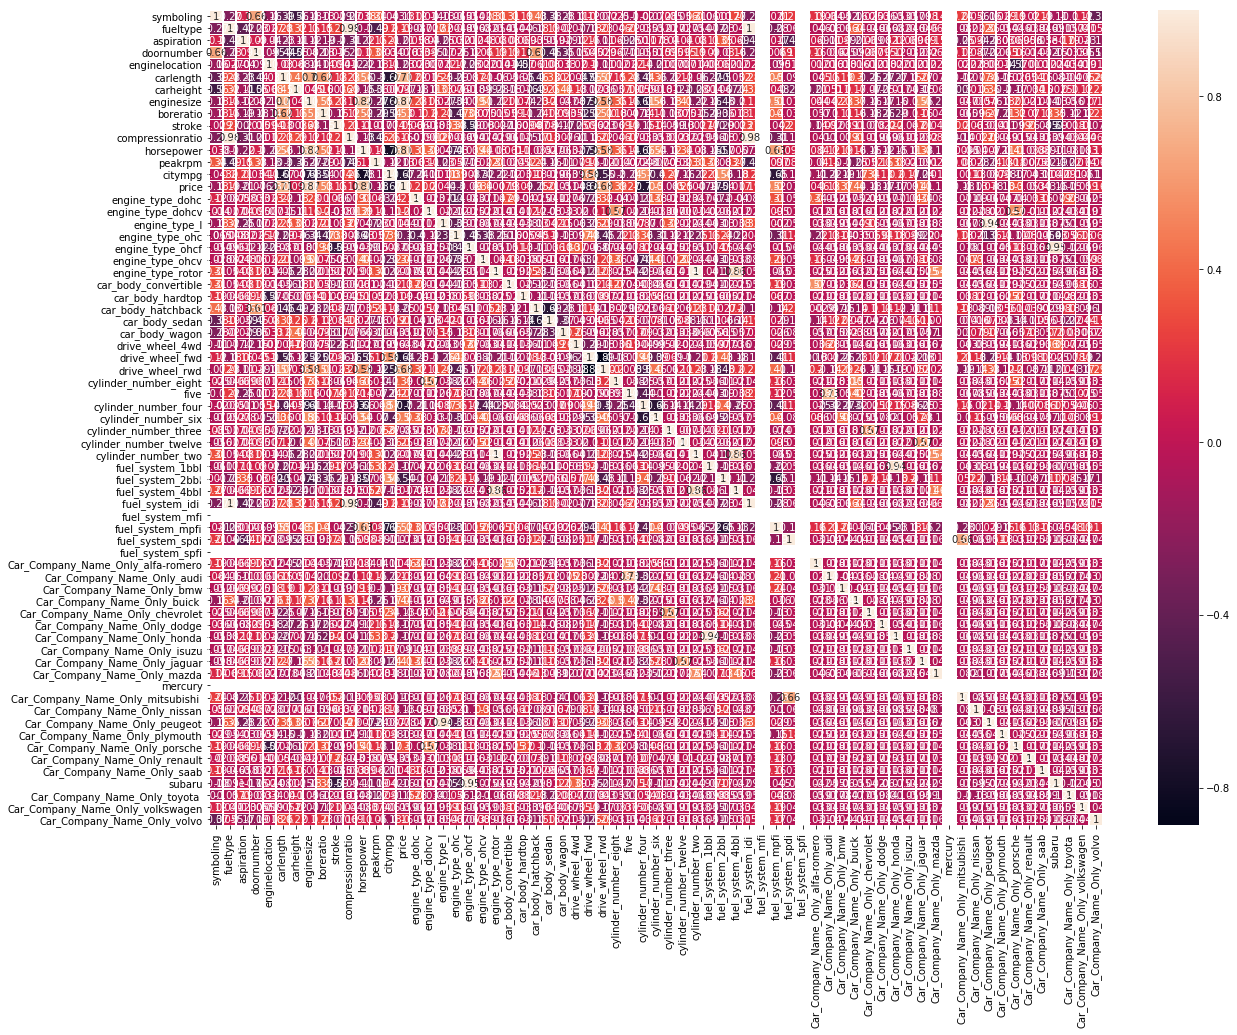

In [1278]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 15))
sns.heatmap(cars_train.corr(), annot = True, linewidths = .5)
plt.show()

In [1279]:
#Dividing into X and Y sets for the model building
cars_y_train = cars_train.pop('price')
cars_x_train = cars_train

In [1280]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(cars_x_train, cars_y_train)

In [1281]:
#columns which are selected using the RFE method
cars_train.columns[rfe.support_]

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'engine_type_dohcv',
       'engine_type_rotor', 'cylinder_number_eight', 'cylinder_number_four',
       'cylinder_number_three', 'cylinder_number_twelve',
       'cylinder_number_two', 'Car_Company_Name_Only_audi',
       'Car_Company_Name_Only_bmw', 'Car_Company_Name_Only_buick ',
       'Car_Company_Name_Only_porsche'],
      dtype='object')

In [1282]:
#columns which are to be dropped
columns_to_be_dropped = cars_x_train.columns[~rfe.support_]
cars_x_train.drop(columns_to_be_dropped, axis =1, inplace = True)

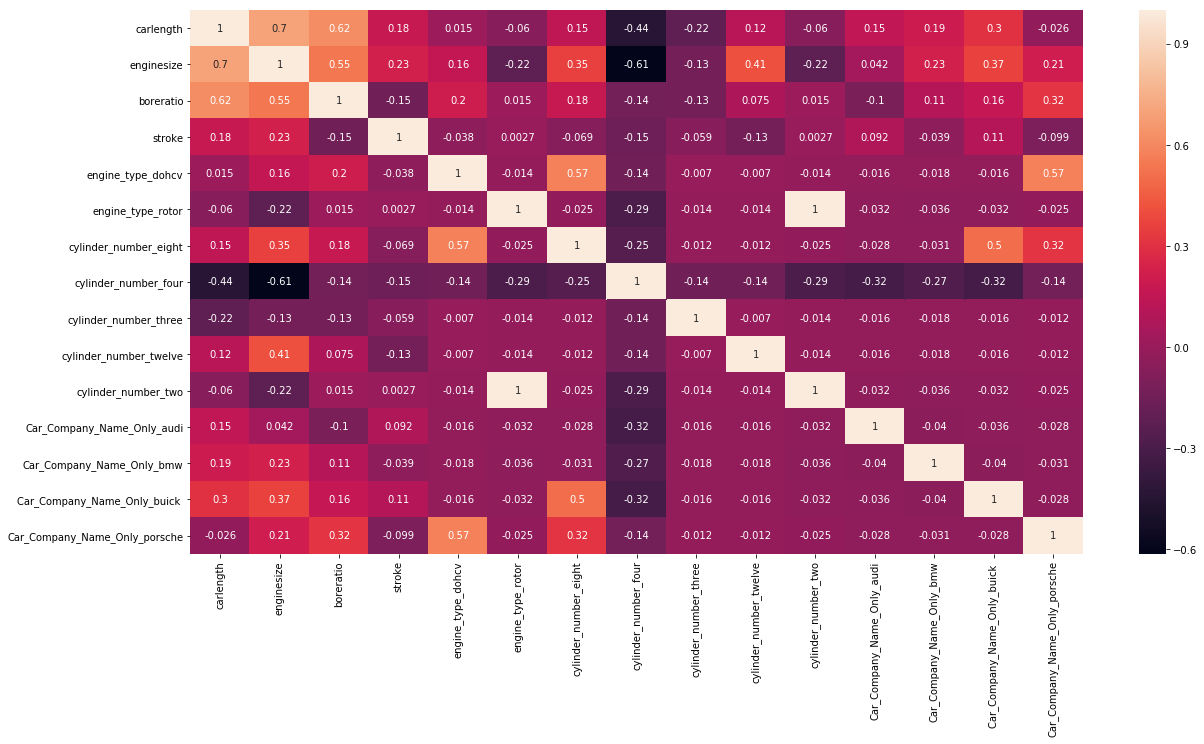

In [1283]:
plt.figure(figsize = (20,10))  
sns.heatmap(cars_x_train.corr(),annot = True)

In [1284]:
#linear Regression using stats model
import statsmodels.api as sm
cars_x_train_linear_model_1 = sm.add_constant(cars_x_train)
stas_model_linear = sm.OLS(cars_y_train,cars_x_train_linear_model_1).fit() 
print(stas_model_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           8.94e-61
Time:                        17:45:46   Log-Likelihood:                 191.70
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     128   BIC:                            -309.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [1285]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = cars_x_train.columns
vif['VIF'] = [variance_inflation_factor(cars_x_train.values, i) for i in range(cars_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features        VIF
5               engine_type_rotor        inf
10            cylinder_number_two        inf
1                      enginesize  78.520000
2                       boreratio  47.790000
3                          stroke  41.590000
7            cylinder_number_four  28.620000
0                       carlength  24.850000
6           cylinder_number_eight   4.560000
9          cylinder_number_twelve   3.610000
4               engine_type_dohcv   3.180000
13   Car_Company_Name_Only_buick    2.290000
14  Car_Company_Name_Only_porsche   1.910000
11     Car_Company_Name_Only_audi   1.630000
8           cylinder_number_three   1.330000
12      Car_Company_Name_Only_bmw   1.240000

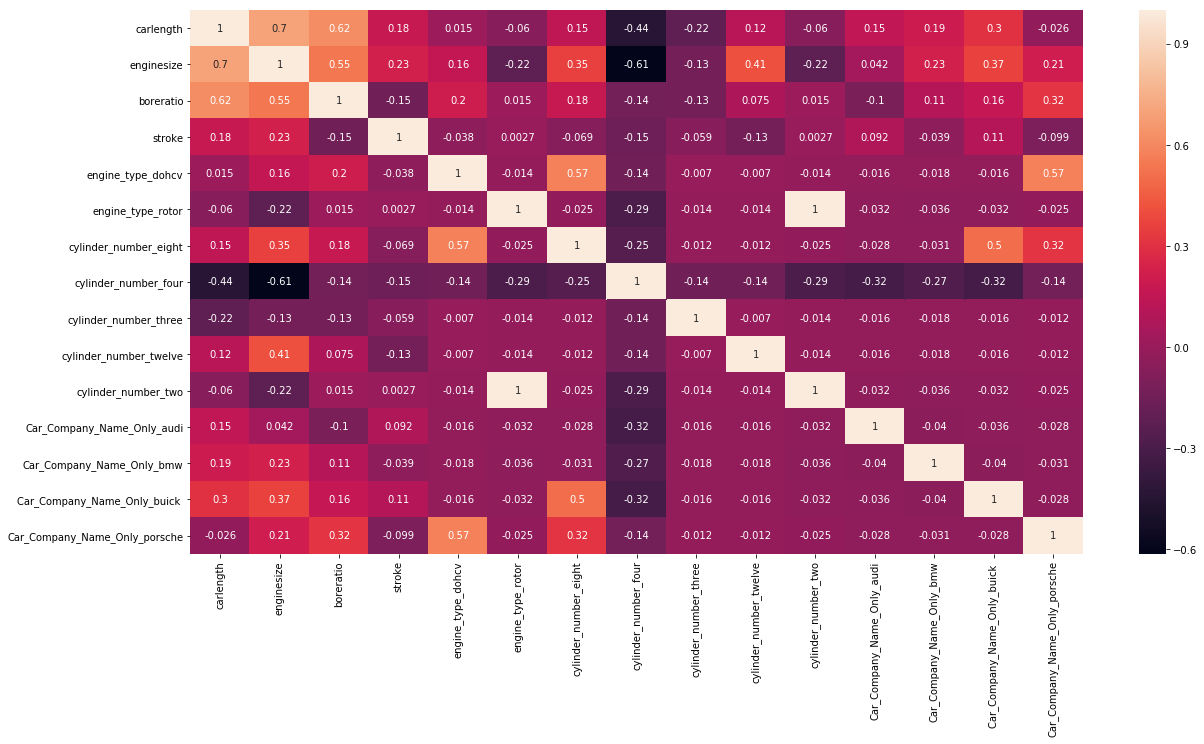

In [1286]:
plt.figure(figsize = (20,10))  
sns.heatmap(cars_x_train.corr(),annot = True)

In [1287]:
#from the above heatmap we can see that cylinder_number_two and engine_type_rotor are co-related since they have 1. hence removing 
cars_x_train.drop(['cylinder_number_two'], axis =1, inplace = True)

In [1288]:
#creating a stats model 2nd time 
cars_x_train_linear_model_2 = sm.add_constant(cars_x_train)
stas_model_linear_two = sm.OLS(cars_y_train,cars_x_train_linear_model_2).fit() 
print(stas_model_linear_two.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           8.94e-61
Time:                        17:45:54   Log-Likelihood:                 191.70
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     128   BIC:                            -309.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [1289]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = cars_x_train.columns
vif['VIF'] = [variance_inflation_factor(cars_x_train.values, i) for i in range(cars_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                      enginesize  78.52
2                       boreratio  47.79
3                          stroke  41.59
7            cylinder_number_four  28.62
0                       carlength  24.85
6           cylinder_number_eight   4.56
5               engine_type_rotor   4.27
9          cylinder_number_twelve   3.61
4               engine_type_dohcv   3.18
12   Car_Company_Name_Only_buick    2.29
13  Car_Company_Name_Only_porsche   1.91
10     Car_Company_Name_Only_audi   1.63
8           cylinder_number_three   1.33
11      Car_Company_Name_Only_bmw   1.24

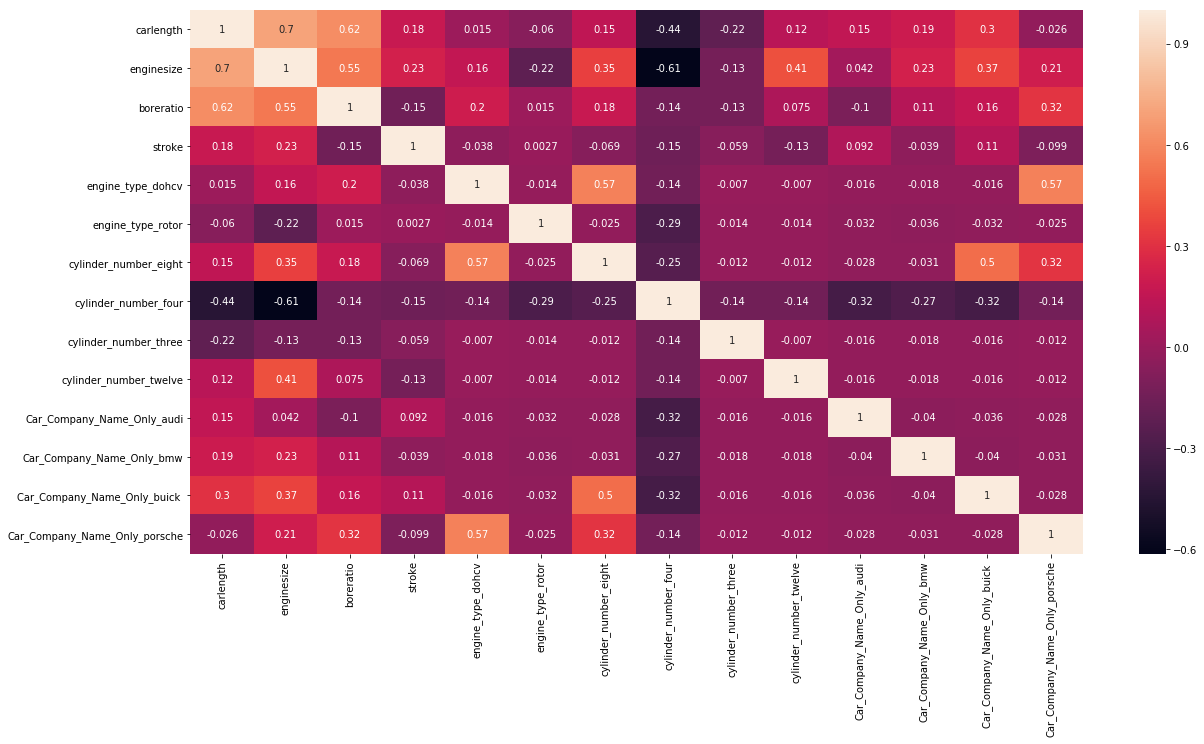

In [1290]:
plt.figure(figsize = (20,10))  
sns.heatmap(cars_x_train.corr(),annot = True)

In [1291]:
#from the above heat map cylinder_number_eight has vif of 4.56 and positively co-related withengine_type_dohcv 0.57 , car_company_name_onlu_buik 0.5.hence dropping cylinder_number_right
cars_x_train.drop(['cylinder_number_eight'], axis =1, inplace = True)

In [1292]:
#creating a stats model 3rd time time 
cars_x_train_linear_model_3 = sm.add_constant(cars_x_train)
stas_model_linear_three = sm.OLS(cars_y_train,cars_x_train_linear_model_3).fit() 
print(stas_model_linear_three.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     98.52
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.50e-60
Time:                        17:46:07   Log-Likelihood:                 187.93
No. Observations:                 143   AIC:                            -347.9
Df Residuals:                     129   BIC:                            -306.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [1293]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = cars_x_train.columns
vif['VIF'] = [variance_inflation_factor(cars_x_train.values, i) for i in range(cars_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                      enginesize  43.90
2                       boreratio  32.86
3                          stroke  25.24
0                       carlength  24.50
6            cylinder_number_four  17.27
5               engine_type_rotor   2.83
8          cylinder_number_twelve   2.48
12  Car_Company_Name_Only_porsche   1.91
4               engine_type_dohcv   1.52
9      Car_Company_Name_Only_audi   1.46
11   Car_Company_Name_Only_buick    1.38
10      Car_Company_Name_Only_bmw   1.24
7           cylinder_number_three   1.20

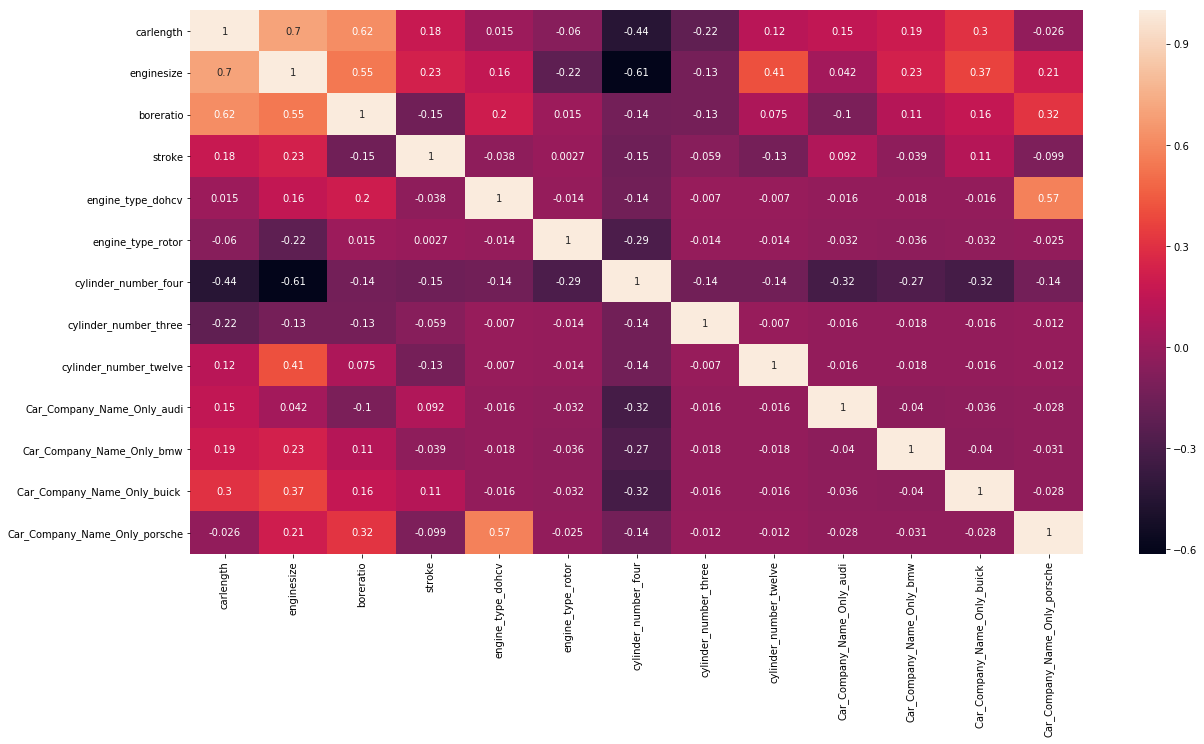

In [1294]:
plt.figure(figsize = (20,10))  
sns.heatmap(cars_x_train.corr(),annot = True)

In [1295]:
#cylinder_number_four has the very high p value and negatively co-releated to enginesize -0.61. hence dropping 
cars_x_train.drop(['cylinder_number_four'], axis =1, inplace = True)

In [1296]:
#creating a stats model 4th time time 
cars_x_train_linear_model_4 = sm.add_constant(cars_x_train)
stas_model_linear_four = sm.OLS(cars_y_train,cars_x_train_linear_model_4).fit() 
print(stas_model_linear_four.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     102.7
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           3.49e-60
Time:                        17:46:17   Log-Likelihood:                 184.94
No. Observations:                 143   AIC:                            -343.9
Df Residuals:                     130   BIC:                            -305.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [1297]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = cars_x_train.columns
vif['VIF'] = [variance_inflation_factor(cars_x_train.values, i) for i in range(cars_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       carlength  24.44
1                      enginesize  14.11
2                       boreratio  13.65
3                          stroke   7.09
11  Car_Company_Name_Only_porsche   1.90
7          cylinder_number_twelve   1.64
4               engine_type_dohcv   1.51
10   Car_Company_Name_Only_buick    1.38
9       Car_Company_Name_Only_bmw   1.23
5               engine_type_rotor   1.18
8      Car_Company_Name_Only_audi   1.17
6           cylinder_number_three   1.04

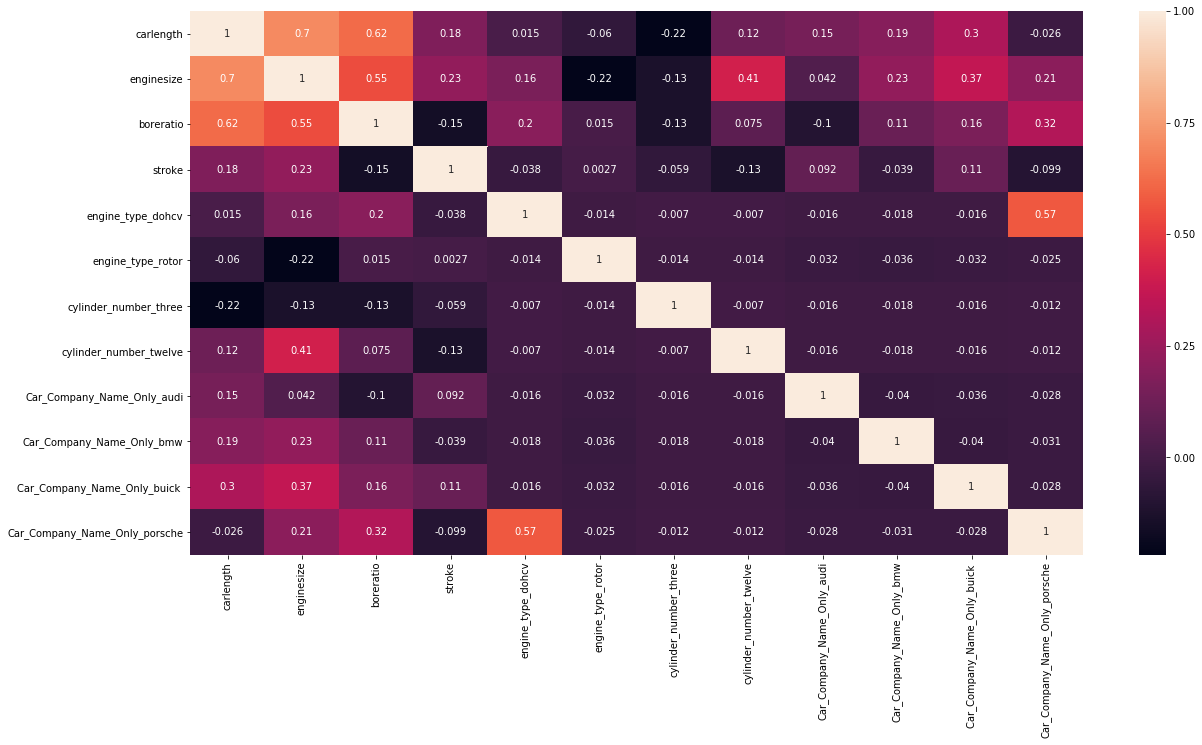

In [1298]:
plt.figure(figsize = (20,10))  
sns.heatmap(cars_x_train.corr(),annot = True)

In [1299]:
#from the above summary engine_type_dohcv has a higher p value and co relation between the car_company_name_only_porsche is 0.57. hence removing it
cars_x_train.drop(['engine_type_dohcv'], axis =1, inplace = True)

In [1300]:
#creating a stats model 5th time time 
cars_x_train_linear_model_5 = sm.add_constant(cars_x_train)
stas_model_linear_five = sm.OLS(cars_y_train,cars_x_train_linear_model_5).fit() 
print(stas_model_linear_five.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     112.8
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           3.44e-61
Time:                        17:46:29   Log-Likelihood:                 184.86
No. Observations:                 143   AIC:                            -345.7
Df Residuals:                     131   BIC:                            -310.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [1301]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = cars_x_train.columns
vif['VIF'] = [variance_inflation_factor(cars_x_train.values, i) for i in range(cars_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       carlength  24.44
1                      enginesize  14.05
2                       boreratio  13.65
3                          stroke   7.09
6          cylinder_number_twelve   1.64
10  Car_Company_Name_Only_porsche   1.44
9    Car_Company_Name_Only_buick    1.37
8       Car_Company_Name_Only_bmw   1.23
4               engine_type_rotor   1.18
7      Car_Company_Name_Only_audi   1.17
5           cylinder_number_three   1.04

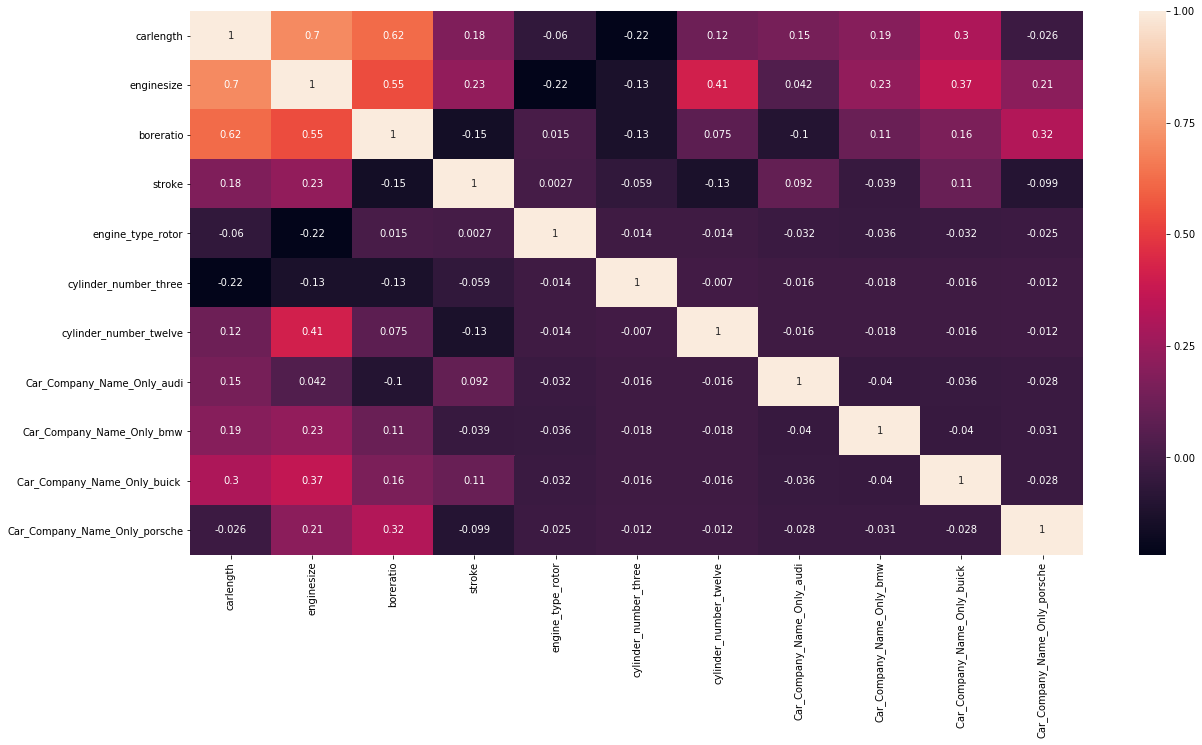

In [1302]:
plt.figure(figsize = (20,10))  
sns.heatmap(cars_x_train.corr(),annot = True)

In [1303]:
#from the above heat map cylinder_number_twelve has a portive co relation between enginesize of 0.41. hence dropping it
cars_x_train.drop(['cylinder_number_twelve'], axis =1, inplace = True)

In [1304]:
#creating a stats model 6th time time 
cars_x_train_linear_model_6 = sm.add_constant(cars_x_train)
stas_model_linear_six = sm.OLS(cars_y_train,cars_x_train_linear_model_6).fit() 
print(stas_model_linear_six.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     122.8
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           8.52e-62
Time:                        17:46:41   Log-Likelihood:                 183.72
No. Observations:                 143   AIC:                            -345.4
Df Residuals:                     132   BIC:                            -312.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [1305]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = cars_x_train.columns
vif['VIF'] = [variance_inflation_factor(cars_x_train.values, i) for i in range(cars_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                      carlength  24.02
2                      boreratio  13.50
1                     enginesize   9.07
3                         stroke   6.47
9  Car_Company_Name_Only_porsche   1.37
8   Car_Company_Name_Only_buick    1.26
6     Car_Company_Name_Only_audi   1.17
7      Car_Company_Name_Only_bmw   1.16
4              engine_type_rotor   1.13
5          cylinder_number_three   1.04

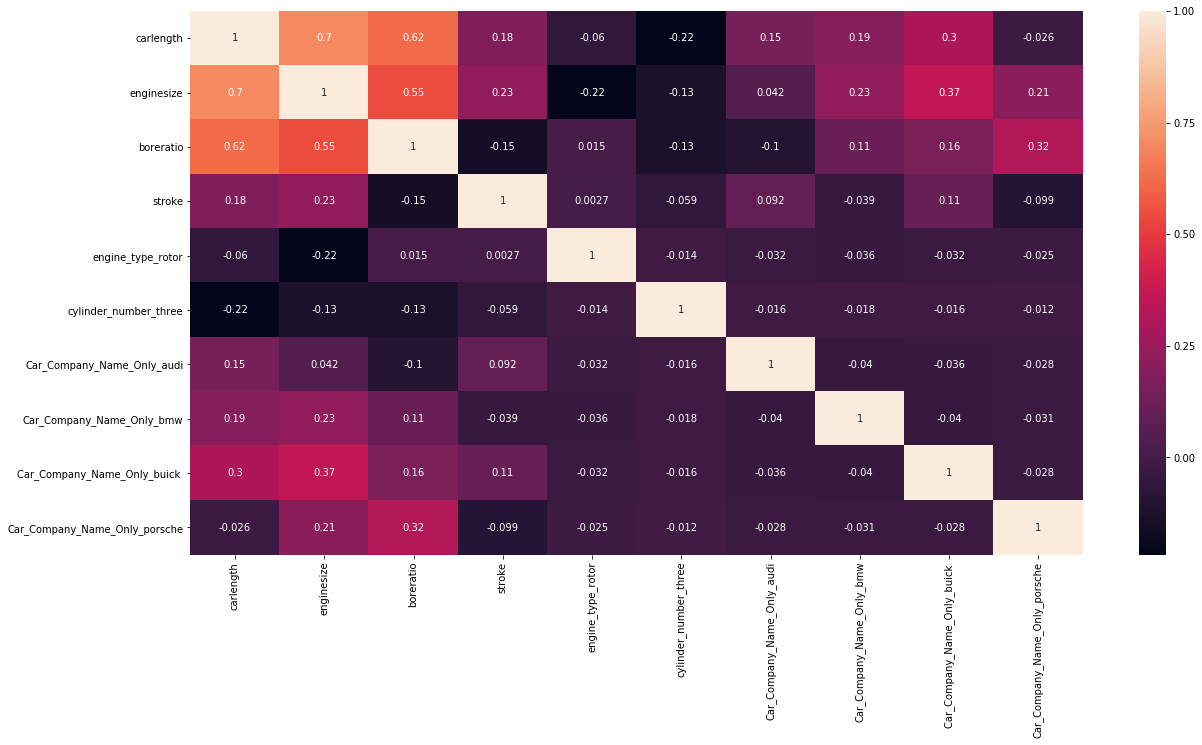

In [1306]:
plt.figure(figsize = (20,10))  
sns.heatmap(cars_x_train.corr(),annot = True)

In [1307]:
# from the above we can see that boreratio p value is higher 13.50 and postively co related with carlength 0.62 and enginesize 0.55. hence dropiing it 
cars_x_train.drop(['boreratio'], axis =1, inplace = True)

In [1308]:
#creating a stats model 7th time time 
cars_x_train_linear_model_7 = sm.add_constant(cars_x_train)
stas_model_linear_seven = sm.OLS(cars_y_train,cars_x_train_linear_model_7).fit() 
print(stas_model_linear_seven.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     133.9
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           3.36e-62
Time:                        17:46:55   Log-Likelihood:                 182.03
No. Observations:                 143   AIC:                            -344.1
Df Residuals:                     133   BIC:                            -314.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [1309]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = cars_x_train.columns
vif['VIF'] = [variance_inflation_factor(cars_x_train.values, i) for i in range(cars_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                      carlength  12.70
1                     enginesize   9.03
2                         stroke   6.47
7   Car_Company_Name_Only_buick    1.23
6      Car_Company_Name_Only_bmw   1.16
8  Car_Company_Name_Only_porsche   1.16
3              engine_type_rotor   1.11
5     Car_Company_Name_Only_audi   1.07
4          cylinder_number_three   1.03

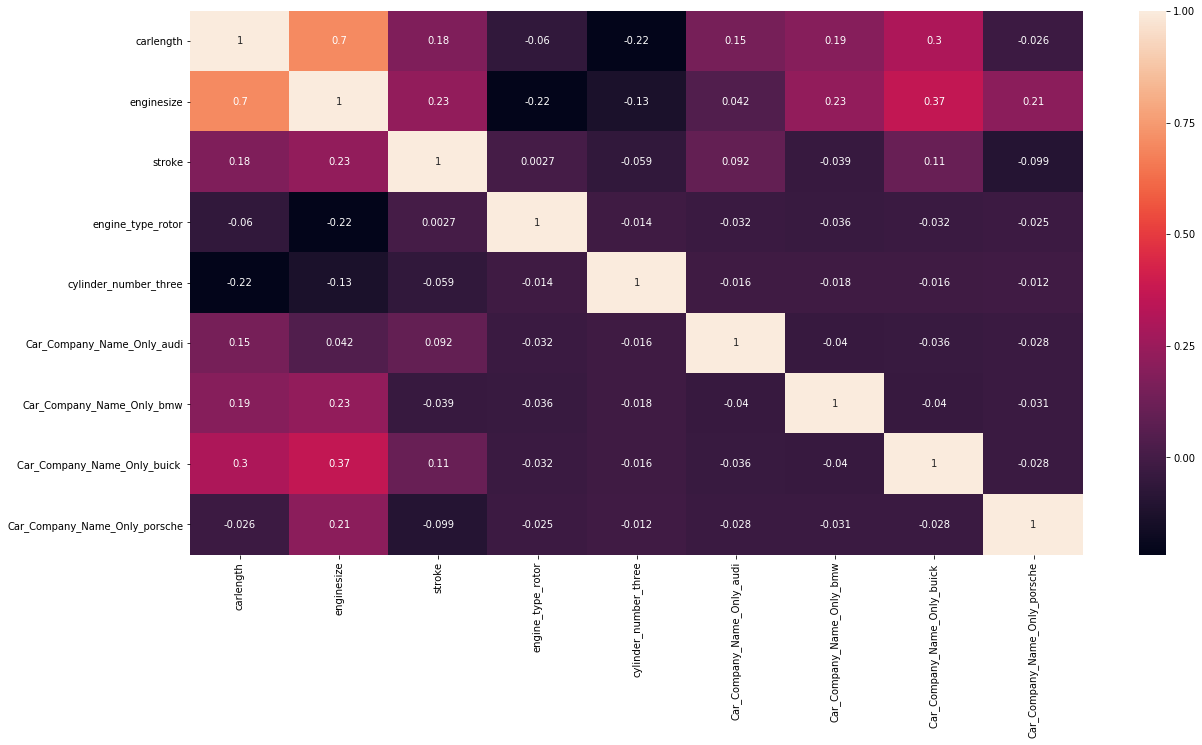

In [1310]:
plt.figure(figsize = (20,10))  
sns.heatmap(cars_x_train.corr(),annot = True)

In [1311]:
#from the above summary the highest p value is cylinder_number_three 0.368 
cars_x_train.drop(['cylinder_number_three'], axis =1, inplace = True)

In [1312]:
#creating a stats model 8th time time 
cars_x_train_linear_model_8 = sm.add_constant(cars_x_train)
stas_model_linear_eight = sm.OLS(cars_y_train,cars_x_train_linear_model_8).fit() 
print(stas_model_linear_eight.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.31e-62
Time:                        17:47:02   Log-Likelihood:                 180.32
No. Observations:                 143   AIC:                            -342.6
Df Residuals:                     134   BIC:                            -316.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [1313]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = cars_x_train.columns
vif['VIF'] = [variance_inflation_factor(cars_x_train.values, i) for i in range(cars_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                      carlength  12.58
1                     enginesize   9.03
2                         stroke   6.30
6   Car_Company_Name_Only_buick    1.23
7  Car_Company_Name_Only_porsche   1.16
5      Car_Company_Name_Only_bmw   1.15
3              engine_type_rotor   1.11
4     Car_Company_Name_Only_audi   1.07

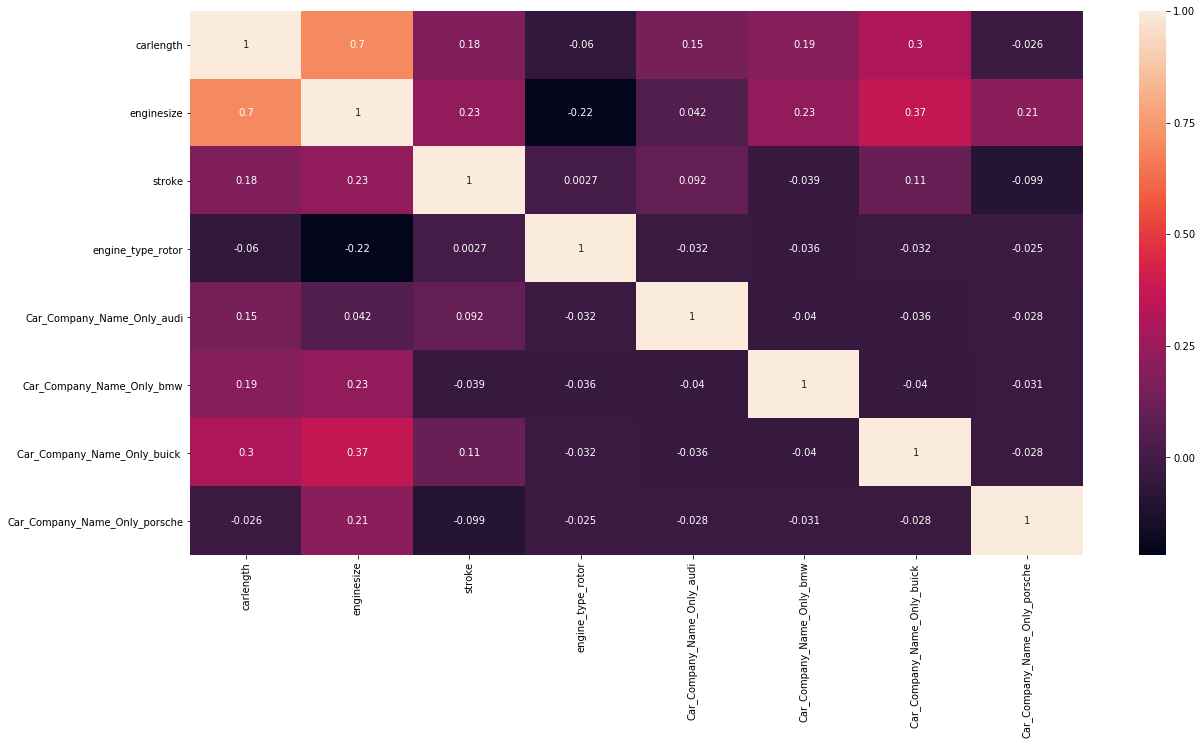

In [1314]:
plt.figure(figsize = (20,10))  
sns.heatmap(cars_x_train.corr(),annot = True)

In [1315]:
#from the above head map carlength is corelated engine size and higher vif value . hence dropping it 
cars_x_train.drop(['carlength'], axis =1, inplace = True)

In [1316]:
#creating a stats model 9th time time 
cars_x_train_linear_model_9 = sm.add_constant(cars_x_train)
stas_model_linear_nine = sm.OLS(cars_y_train,cars_x_train_linear_model_9).fit() 
print(stas_model_linear_nine.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.24e-59
Time:                        17:47:19   Log-Likelihood:                 170.25
No. Observations:                 143   AIC:                            -324.5
Df Residuals:                     135   BIC:                            -300.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [1317]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = cars_x_train.columns
vif['VIF'] = [variance_inflation_factor(cars_x_train.values, i) for i in range(cars_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                     enginesize  4.91
1                         stroke  4.11
5   Car_Company_Name_Only_buick   1.23
4      Car_Company_Name_Only_bmw  1.15
6  Car_Company_Name_Only_porsche  1.12
2              engine_type_rotor  1.08
3     Car_Company_Name_Only_audi  1.05

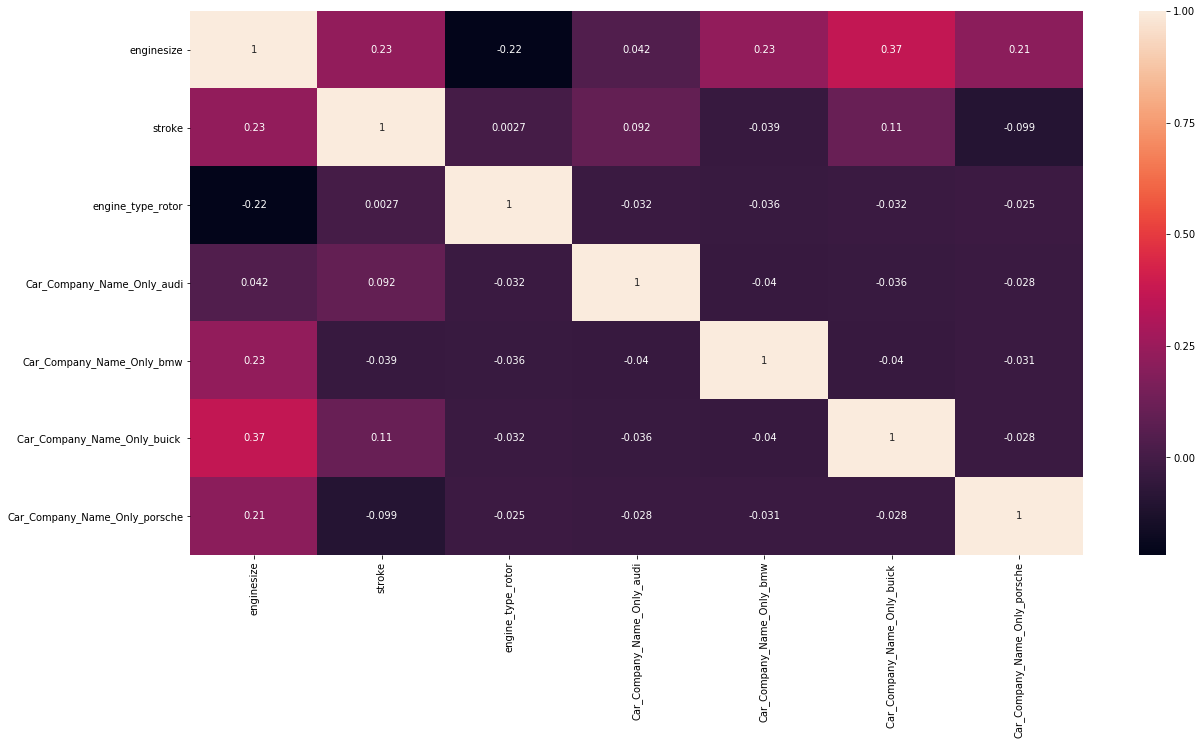

In [1318]:
plt.figure(figsize = (20,10))  
sns.heatmap(cars_x_train.corr(),annot = True)

In [1319]:
#from the above heat map stroke is co related witj enginesize and the higher vif value. hence dropping 
cars_x_train.drop(['stroke'], axis =1, inplace = True)

In [1320]:
#creating a stats model 10th time time 
cars_x_train_linear_model_10 = sm.add_constant(cars_x_train)
stas_model_linear_ten = sm.OLS(cars_y_train,cars_x_train_linear_model_10).fit() 
print(stas_model_linear_ten.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     169.7
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.35e-60
Time:                        17:47:32   Log-Likelihood:                 169.83
No. Observations:                 143   AIC:                            -325.7
Df Residuals:                     136   BIC:                            -304.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [1321]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = cars_x_train.columns
vif['VIF'] = [variance_inflation_factor(cars_x_train.values, i) for i in range(cars_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                     enginesize  1.42
4   Car_Company_Name_Only_buick   1.17
3      Car_Company_Name_Only_bmw  1.12
5  Car_Company_Name_Only_porsche  1.08
2     Car_Company_Name_Only_audi  1.05
1              engine_type_rotor  1.00

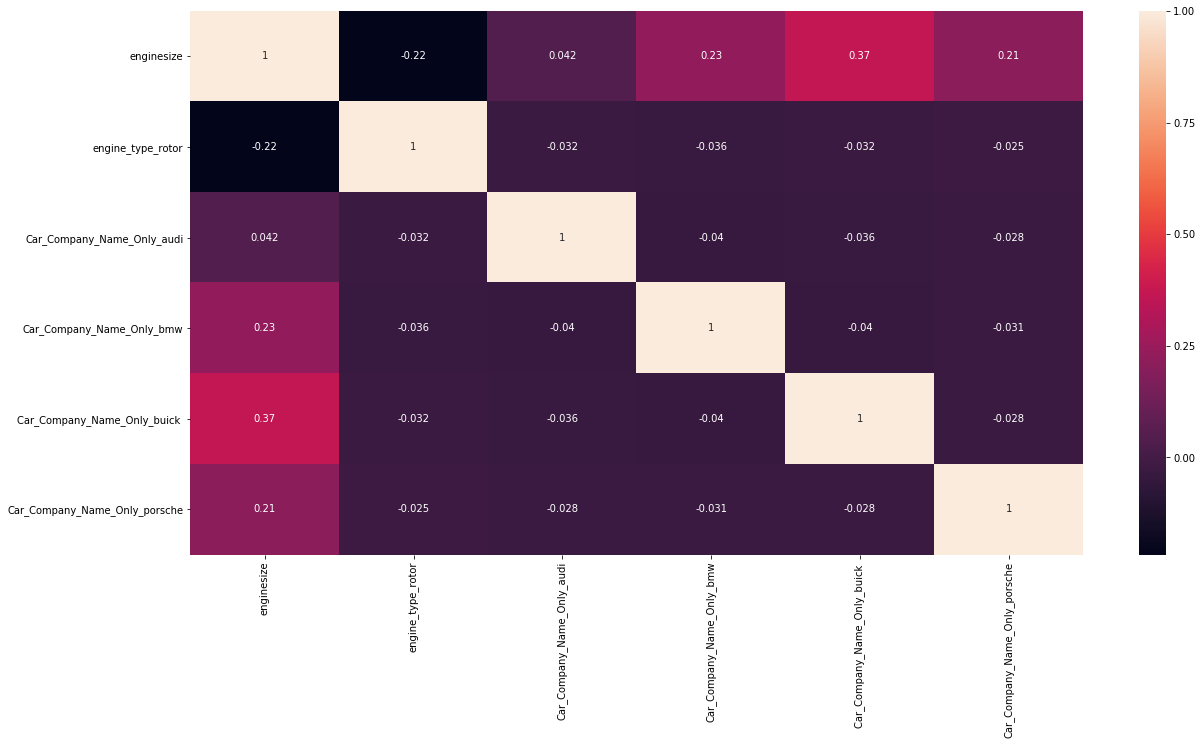

In [1322]:
plt.figure(figsize = (20,10))  
sns.heatmap(cars_x_train.corr(),annot = True)

In [1323]:
#residual analysis of the train data
cars_y_train_price = stas_model_linear_ten.predict(cars_x_train_linear_model_10)

Text(0.5, 0, 'Errors')

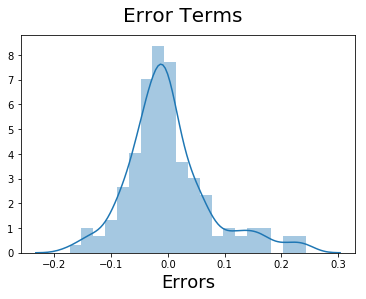

In [1324]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((cars_y_train - cars_y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [1325]:
#Making Predictions Using the Final Model
cars_test[scaling_columns] = scaler.transform(cars_test[scaling_columns])

In [1326]:
cars_test.describe()

symboling   fueltype  aspiration  doornumber  enginelocation  \
count  62.000000  62.000000   62.000000   62.000000       62.000000   
mean    0.583871   0.112903    0.822581    0.435484        0.967742   
std     0.271724   0.319058    0.385142    0.499868        0.178127   
min     0.000000   0.000000    0.000000    0.000000        0.000000   
25%     0.400000   0.000000    1.000000    0.000000        1.000000   
50%     0.600000   0.000000    1.000000    0.000000        1.000000   
75%     0.800000   0.000000    1.000000    1.000000        1.000000   
max     1.000000   1.000000    1.000000    1.000000        1.000000   

       carlength  carheight  enginesize  boreratio     stroke  \
count  62.000000  62.000000   62.000000  62.000000  62.000000   
mean    0.559481   0.559663    0.265673   0.556580   0.544314   
std     0.189947   0.215811    0.162820   0.228484   0.160738   
min     0.056911   0.141593    0.067925  -0.111111  -0.060606   
25%     0.459350   0.384956    0.177358   0.404762   0.484848   
50%     0.547967   0.588496    0.226415   0.563492   0.585859   
75%     0.719919   0.699115    0.316038   0.746032   0.641414   
max     1.089431   1.061947    0.932075   0.888889   0.863636   

                  ...               Car_Company_Name_Only_nissan  \
count             ...                                  62.000000   
mean              ...                                   0.064516   
std               ...                                   0.247676   
min               ...                                   0.000000   
25%               ...                                   0.000000   
50%               ...                                   0.000000   
75%               ...                                   0.000000   
max               ...                                   1.000000   

       Car_Company_Name_Only_peugeot  Car_Company_Name_Only_plymouth  \
count                      62.000000                       62.000000   
mean                        0.048387                        0.048387   
std                         0.216335                        0.216335   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         0.000000                        0.000000   
max                         1.000000                        1.000000   

       Car_Company_Name_Only_porsche  Car_Company_Name_Only_renault  \
count                      62.000000                           62.0   
mean                        0.032258                            0.0   
std                         0.178127                            0.0   
min                         0.000000                            0.0   
25%                         0.000000                            0.0   
50%                         0.000000                            0.0   
75%                         0.000000                            0.0   
max                         1.000000                            0.0   

       Car_Company_Name_Only_saab     subaru  Car_Company_Name_Only_toyota   \
count                   62.000000  62.000000                      62.000000   
mean                     0.048387   0.016129                       0.193548   
std                      0.216335   0.127000                       0.398304   
min                      0.000000   0.000000                       0.000000   
25%                      0.000000   0.000000                       0.000000   
50%                      0.000000   0.000000                       0.000000   
75%                      0.000000   0.000000                       0.000000   
max                      1.000000   1.000000                       1.000000   

       Car_Company_Name_Only_volkswagen  Car_Company_Name_Only_volvo  
count                         62.000000                    62.000000  
mean                     

In [1327]:
#select only the rfe columns for the test data as well
cars_test = cars_test[['enginesize', 'engine_type_rotor', 'Car_Company_Name_Only_audi',
       'Car_Company_Name_Only_bmw', 'Car_Company_Name_Only_buick ',
       'Car_Company_Name_Only_porsche','price']]

In [1328]:
cars_test.describe()

enginesize  engine_type_rotor  Car_Company_Name_Only_audi  \
count   62.000000               62.0                   62.000000   
mean     0.265673                0.0                    0.032258   
std      0.162820                0.0                    0.178127   
min      0.067925                0.0                    0.000000   
25%      0.177358                0.0                    0.000000   
50%      0.226415                0.0                    0.000000   
75%      0.316038                0.0                    0.000000   
max      0.932075                0.0                    1.000000   

       Car_Company_Name_Only_bmw  Car_Company_Name_Only_buick   \
count                  62.000000                     62.000000   
mean                    0.032258                      0.048387   
std                     0.178127                      0.216335   
min                     0.000000                      0.000000   
25%                     0.000000                      0.000000   
50%                     0.000000                      0.000000   
75%                     0.000000                      0.000000   
max                     1.000000                      1.000000   

       Car_Company_Name_Only_porsche      price  
count                      62.000000  62.000000  
mean                        0.032258   0.239439  
std                         0.178127   0.233076  
min                         0.000000   0.007763  
25%                         0.000000   0.092342  
50%                         0.000000   0.158991  
75%                         0.000000   0.317243  
max                         1.000000   1.112855

In [1329]:
#Dividing into X_test and y_test
y_test = cars_test.pop('price')
x_test = cars_test

In [1330]:
# Adding constant variable to test dataframe
x_test_m4 = sm.add_constant(x_test)

In [1333]:
# Making predictions using the tenth model
y_pred_m4 = stas_model_linear_ten.predict(x_test_m4)

Text(0, 0.5, 'y_pred')

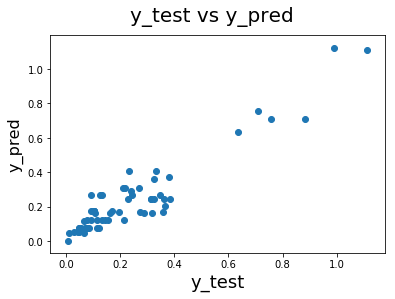

In [1334]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [1335]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.879370510397811

In [ ]:
#so final equation is 
#y = 1.0430 * enginesize + 
#0.2405 * engine_type_rotor +  
#0.1478 * Car_Company_Name_Only_audi + 
#0.2408 * Car_Company_Name_Only_bmw + 
#0.2200 * Car_Company_Name_Only_buick + 
#0.2524 * Car_Company_Name_Only_porsche - 0.0674